In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import tensorflow as tf
import tensorflow. keras as keras
import keras
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
from tensorflow.keras import datasets

# Load CIFAR-10 data
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

print("Train images:", x_train.shape)
print("Train labels:", y_train.shape)
print("Test images :", x_test.shape)
print("Test labels :", y_test.shape)

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(class_names)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Train images: (50000, 32, 32, 3)
Train labels: (50000, 1)
Test images : (10000, 32, 32, 3)
Test labels : (10000, 1)


In [4]:
x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32") / 255.0


In [6]:
from tensorflow.keras.utils import to_categorical
y_train_cat = to_categorical(y_train, num_classes)
y_test_cat  = to_categorical(y_test, num_classes)

print("y_train_cat shape:", y_train_cat.shape)  # (50000, 10)


y_train_cat shape: (50000, 10)


In [10]:
from tensorflow.keras import datasets, layers, models

def build_cnn_model(input_shape=(32, 32, 3), num_classes=10):
    model = models.Sequential([
        # Block 1
        layers.Conv2D(32, (3, 3), padding='same', activation='relu',
                      input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),

        # Block 2
        layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),

        # Block 3
        layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),

        # Flatten + Dense layers
        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.5),

        # Output layer
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

model = build_cnn_model(input_shape=(32, 32, 3), num_classes=num_classes)
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 620,362 (2.37 MB)

 Trainable params: 620,362 (2.37 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [12]:
history = model.fit(
    x_train, y_train_cat,
    batch_size=64,
    epochs=15,
    validation_split=0.2,
    verbose=1
)


Epoch 1/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.2696 - loss: 1.9628 - val_accuracy: 0.4974 - val_loss: 1.4047
Epoch 2/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.4813 - loss: 1.4326 - val_accuracy: 0.5686 - val_loss: 1.2016
Epoch 3/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5554 - loss: 1.2476 - val_accuracy: 0.6331 - val_loss: 1.0555
Epoch 4/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.5944 - loss: 1.1296 - val_accuracy: 0.6594 - val_loss: 0.9625
Epoch 5/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6231 - loss: 1.0550 - val_accuracy: 0.6788 - val_loss: 0.9142
Epoch 6/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6506 - loss: 0.9969 - val_accuracy: 0.6986 - val_loss: 0.8681
Epoch 7/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6706 - loss: 0.9489 - val_accuracy: 0.7084 - val_loss: 0.8357
Epoch 8/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6852 - loss: 0.9000 - val_accuracy: 0

In [13]:
test_loss, test_acc = model.evaluate(x_test, y_test_cat, verbose=0)
print(f"Test loss: {test_loss:.4f}")
print(f"Test accuracy: {test_acc:.4f}")


Test loss: 0.7105
Test accuracy: 0.7502


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 574ms/step


/tmp/ipython-input-350394478.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  true_label = class_names[int(y_test[i])]


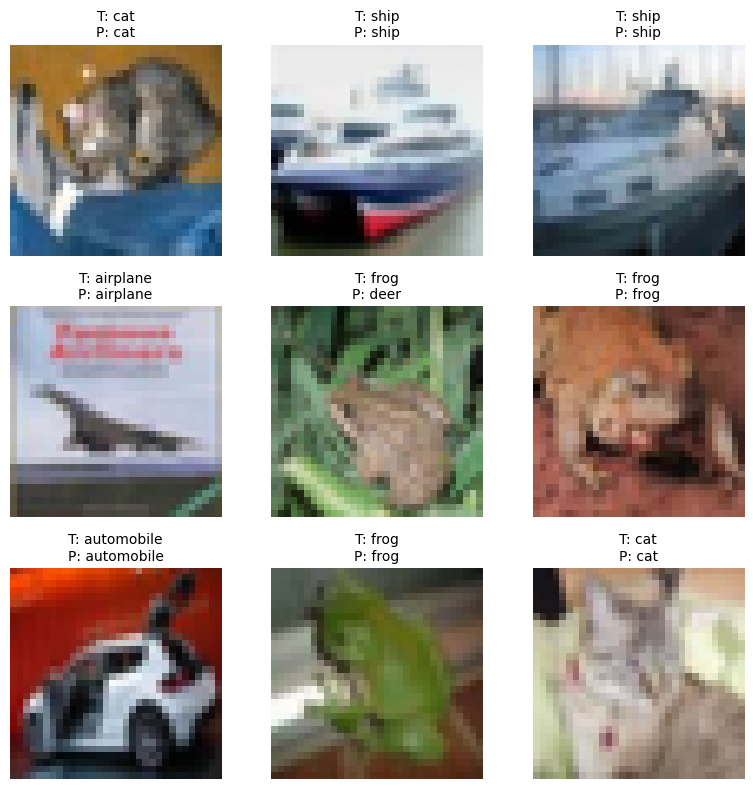

In [14]:
y_pred_probs = model.predict(x_test[:9])
y_pred_classes = np.argmax(y_pred_probs, axis=1)

plt.figure(figsize=(8, 8))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(x_test[i])
    true_label = class_names[int(y_test[i])]
    pred_label = class_names[int(y_pred_classes[i])]
    plt.title(f"T: {true_label}\nP: {pred_label}", fontsize=10)
    plt.axis('off')
plt.tight_layout()
plt.show()
